---
title: "Beer Markets"
author: "Byeong-Hak Choe"
date: "2023-11-02"  # Use the format YYYY-MM-DD
categories: [python, data-analysis, beer]
image: "image.png"
---

Diving into the complex world of what people like in their beer, the `beer_markets.csv` dataset comes across as a goldmine of data, showing us the detailed interactions between buyers and their favorite beers. This dataset covers everything from how much and at what price people are buying beer to how deals and brand loyalty influence their decisions, across different types of people and places. As we start digging into this dataset, we aim to uncover the patterns that show what really influences the modern beer drinker's choices, offering up valuable insights for marketers, industry watchers, and beer lovers. By breaking down the data, our exploration will shine a light on the factors that drive consumer behavior in the beer market, giving us a full picture of the trends that shape this lively industry.










In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the CSV file
beer_data = pd.read_csv("https://bcdanl.github.io/data/beer_markets.csv")

# Setting up the visualisation settings
sns.set(style="whitegrid")

# Calculate total quantity and spending for each brand
brand_summary = beer_data.groupby('brand').agg({'quantity':'sum', 'dollar_spent':'sum'}).reset_index()

# Sort by total quantity and spending
brand_summary_sorted_quantity = brand_summary.sort_values('quantity', ascending=False)
brand_summary_sorted_spent = brand_summary.sort_values('dollar_spent', ascending=False)

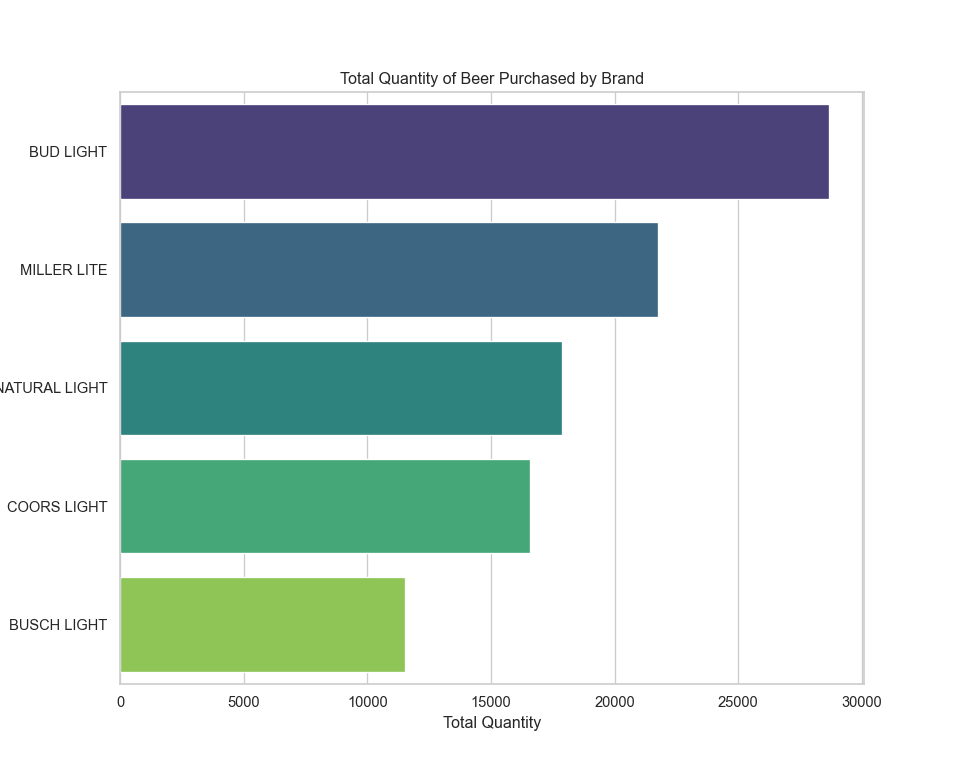

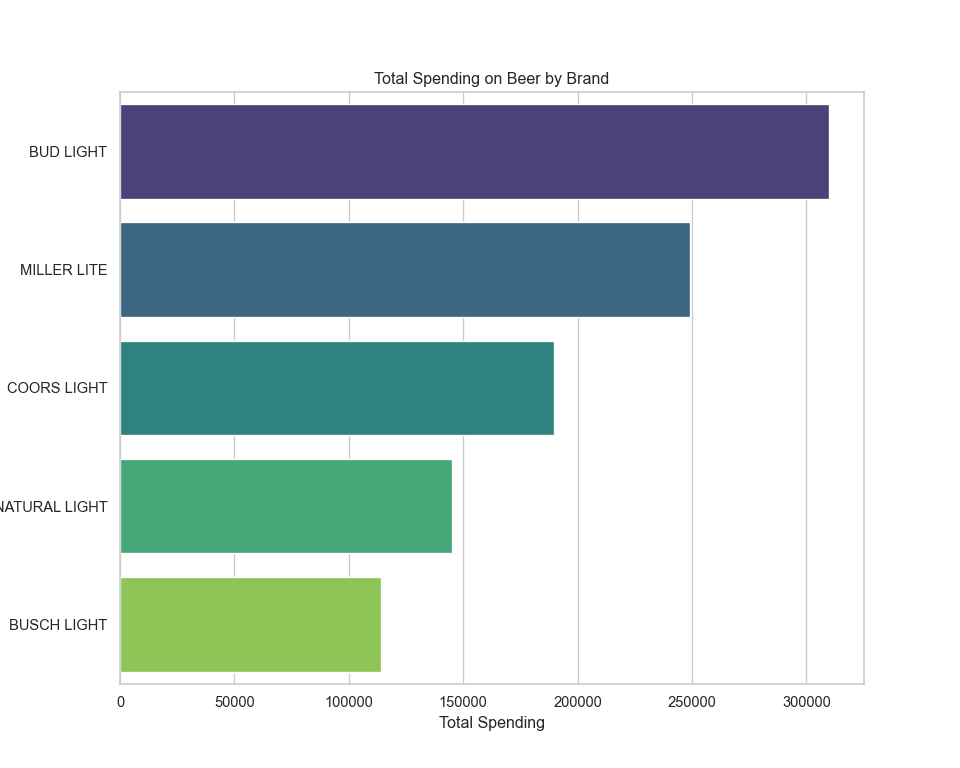

In [ ]:
# Plotting total quantity for each brand
plt.figure(figsize=(10, 8))
sns.barplot(x='quantity', y='brand', data=brand_summary_sorted_quantity, palette='viridis')
plt.title('Total Quantity of Beer Purchased by Brand')
plt.xlabel('Total Quantity')
plt.ylabel('Brand')
plt.show()

The bar charts above display the total quantity of beer purchased and
the total spending by brand. From the looks of it, certain brands
dominate in terms of quantity sold and total spending, indicating their
popularity.

Now, let’s calculate the average quantity purchased and average spending
per purchase. For this, we’ll consider each row in the dataset as a
separate purchase and compute the averages accordingly.

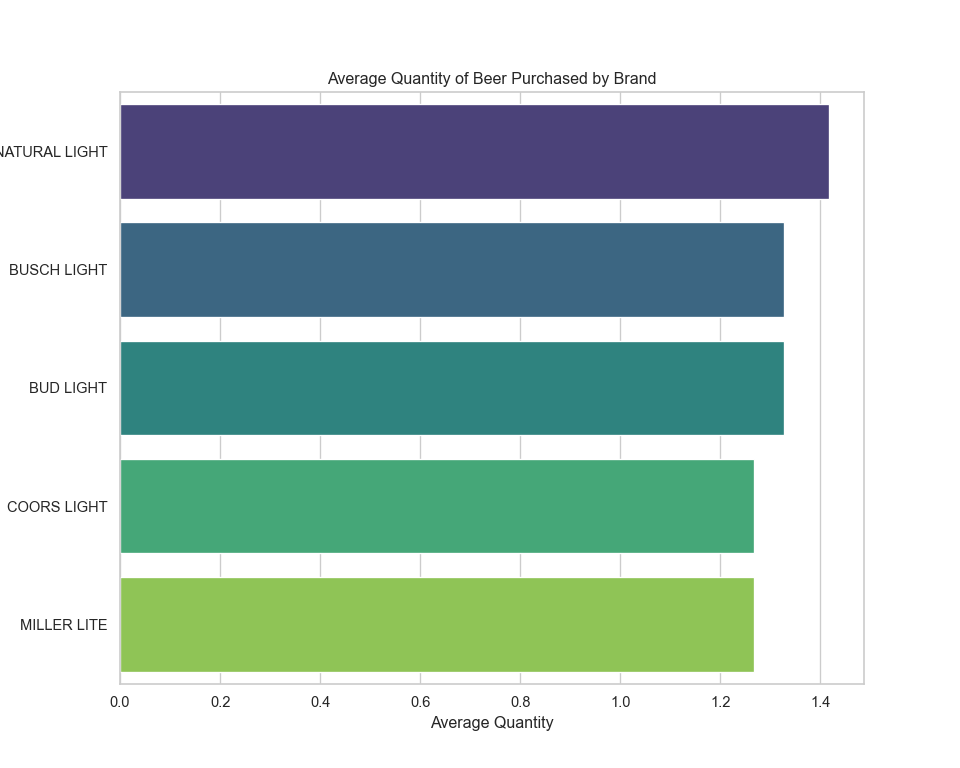

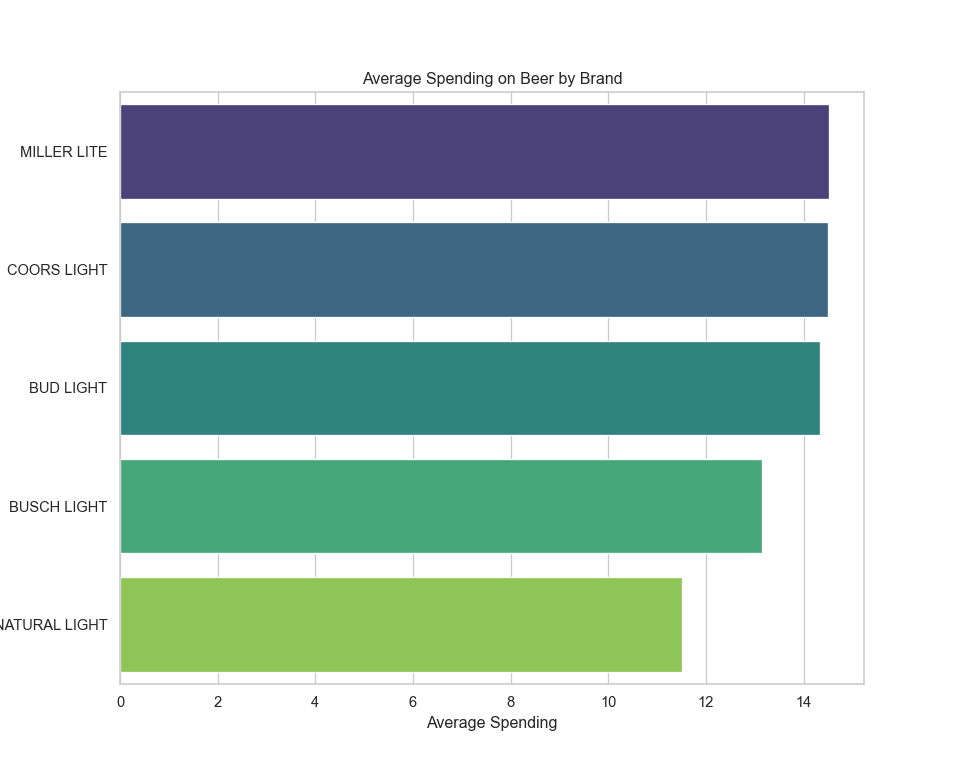

In [ ]:
# Calculate average quantity purchased and average spending per purchase
average_purchase = beer_data.groupby('brand').agg({
    'quantity': 'mean',
    'dollar_spent': 'mean'
}).reset_index()

# Sort by average quantity and average spending
average_purchase_sorted_quantity = average_purchase.sort_values('quantity', ascending=False)
average_purchase_sorted_spent = average_purchase.sort_values('dollar_spent', ascending=False)

# Plotting average quantity for each brand
plt.figure(figsize=(10, 8))
sns.barplot(x='quantity', y='brand', data=average_purchase_sorted_quantity, palette='viridis')
plt.title('Average Quantity of Beer Purchased by Brand')
plt.xlabel('Average Quantity')
plt.ylabel('Brand')
plt.show()

The visualizations above depict the average quantity of beer purchased
per brand and the average spending per brand. This shows which brands
tend to be bought in larger quantities on average and which brands tend
to have higher spending per purchase, which could be indicative of their
price point or the purchase of premium products.

Next, we’ll look at the total spending across different markets to see
if there are any notable differences in spending habits geographically.
To do this, we’ll sum up the spending in each market and visualize it.

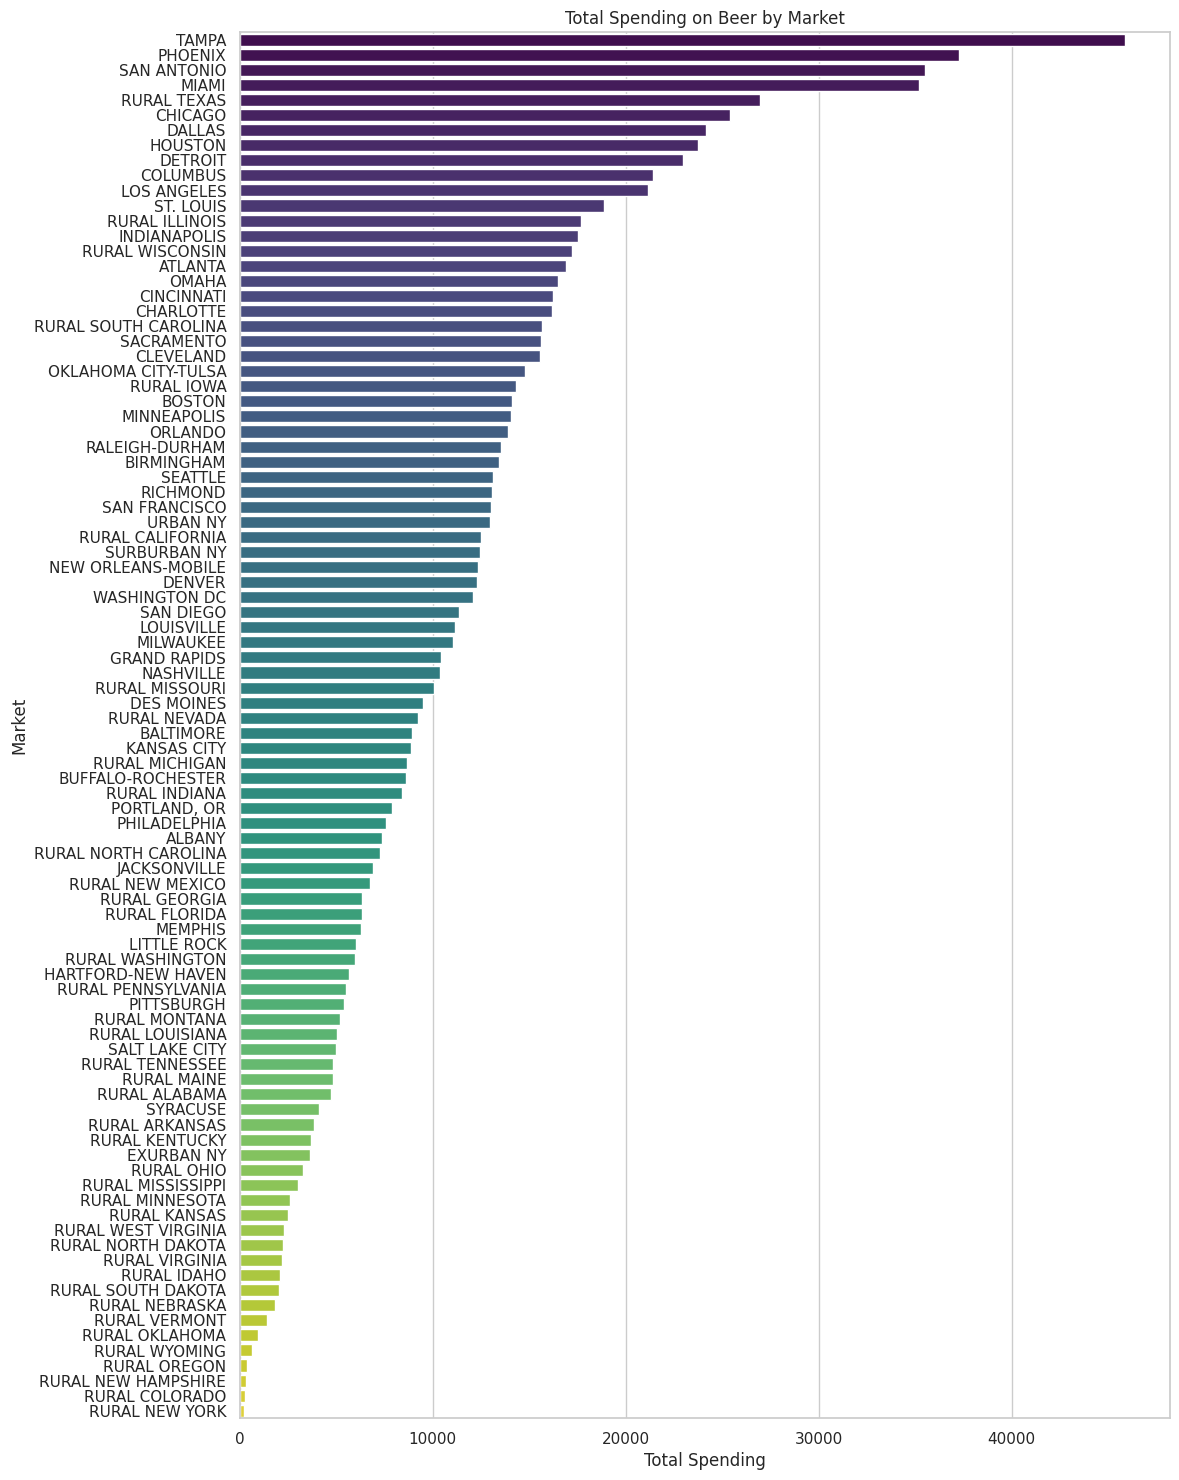

In [2]:
# Calculate total spending in each market
market_spending_summary = beer_data.groupby('market').agg({'dollar_spent':'sum'}).reset_index()

# Sort by total spending
market_spending_summary_sorted = market_spending_summary.sort_values('dollar_spent', ascending=False)

# Plotting total spending in each market
plt.figure(figsize=(12, 18))
sns.barplot(x='dollar_spent', y='market', data=market_spending_summary_sorted, palette='viridis')
plt.title('Total Spending on Beer by Market')
plt.xlabel('Total Spending')
plt.ylabel('Market')
plt.show()

The bar chart illustrates the total spending on beer by market,
showcasing the differences in spending habits across various regions.
Some markets have significantly higher spending, which could be due to a
variety of factors including market size, consumer preferences, or
economic factors.

Now, let’s move on to the second analysis:

## Demographic Analysis

We will examine which demographics are buying what kind of beer and
whether spending habits vary by demographics such as age, employment,
and race. For this, we could look at:

-   Spending by age group
-   Spending by employment status
-   Spending by race

I’ll start by analyzing spending by age group.

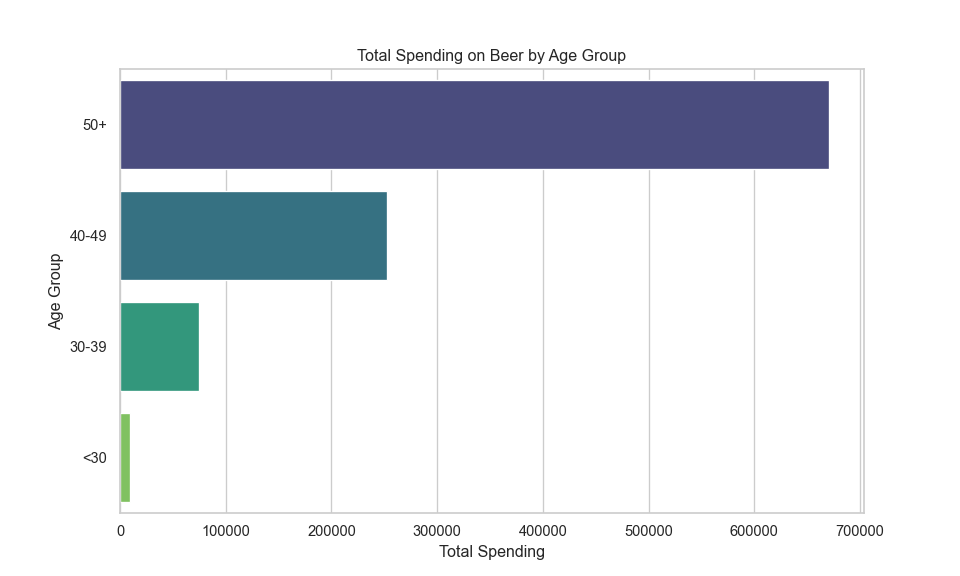

In [ ]:
# Calculate total spending by age group
age_group_spending = beer_data.groupby('age').agg({'dollar_spent':'sum'}).reset_index()

# Sort by total spending
age_group_spending_sorted = age_group_spending.sort_values('dollar_spent', ascending=False)

# Plotting total spending by age group
plt.figure(figsize=(10, 6))
sns.barplot(x='dollar_spent', y='age', data=age_group_spending_sorted, palette='viridis')
plt.title('Total Spending on Beer by Age Group')
plt.xlabel('Total Spending')
plt.ylabel('Age Group')
plt.show()

The bar chart demonstrates the total spending on beer segmented by age
group, highlighting which age groups spend the most on beer. It appears
that certain age groups are more dominant in beer spending, which may
align with the purchasing power or preferences of those groups.

Next, we will examine spending by employment status.

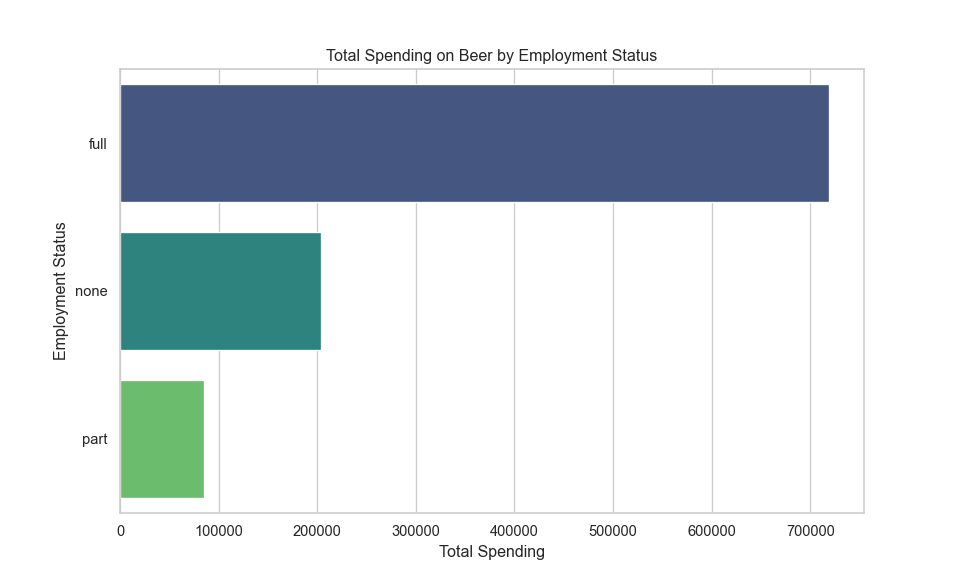

In [ ]:
# Calculate total spending by employment status
employment_spending = beer_data.groupby('employment').agg({'dollar_spent':'sum'}).reset_index()

# Sort by total spending
employment_spending_sorted = employment_spending.sort_values('dollar_spent', ascending=False)

# Plotting total spending by employment status
plt.figure(figsize=(10, 6))
sns.barplot(x='dollar_spent', y='employment', data=employment_spending_sorted, palette='viridis')
plt.title('Total Spending on Beer by Employment Status')
plt.xlabel('Total Spending')
plt.ylabel('Employment Status')
plt.show()

The visualization shows the total spending on beer by employment status.
We can see that certain employment groups, such as full-time workers,
are spending more on beer, which might be related to their disposable
income.

Finally, let’s look at spending by race to complete the demographic
analysis.

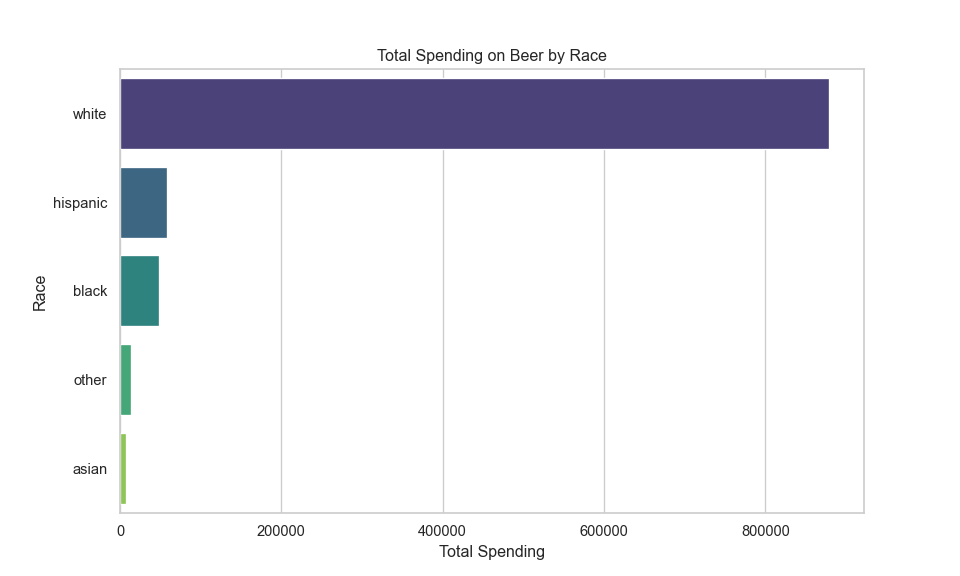

In [ ]:
# Calculate total spending by race
race_spending = beer_data.groupby('race').agg({'dollar_spent':'sum'}).reset_index()

# Sort by total spending
race_spending_sorted = race_spending.sort_values('dollar_spent', ascending=False)

# Plotting total spending by race
plt.figure(figsize=(10, 6))
sns.barplot(x='dollar_spent', y='race', data=race_spending_sorted, palette='viridis')
plt.title('Total Spending on Beer by Race')
plt.xlabel('Total Spending')
plt.ylabel('Race')
plt.show()

The bar chart above indicates the total spending on beer broken down by
race, highlighting which racial groups account for the most beer
spending within the dataset. This could reflect both the demographics of
the regions where the data was collected and cultural preferences
regarding beer.

Now, let’s proceed to the third analysis:

## Price Sensitivity

We’ll look at the price per fluid ounce and see if there are any trends
or correlations with the quantity purchased or the brand popularity. To
do this, we’ll visualize how the price is sensitive to the quantity
purchased by brand.

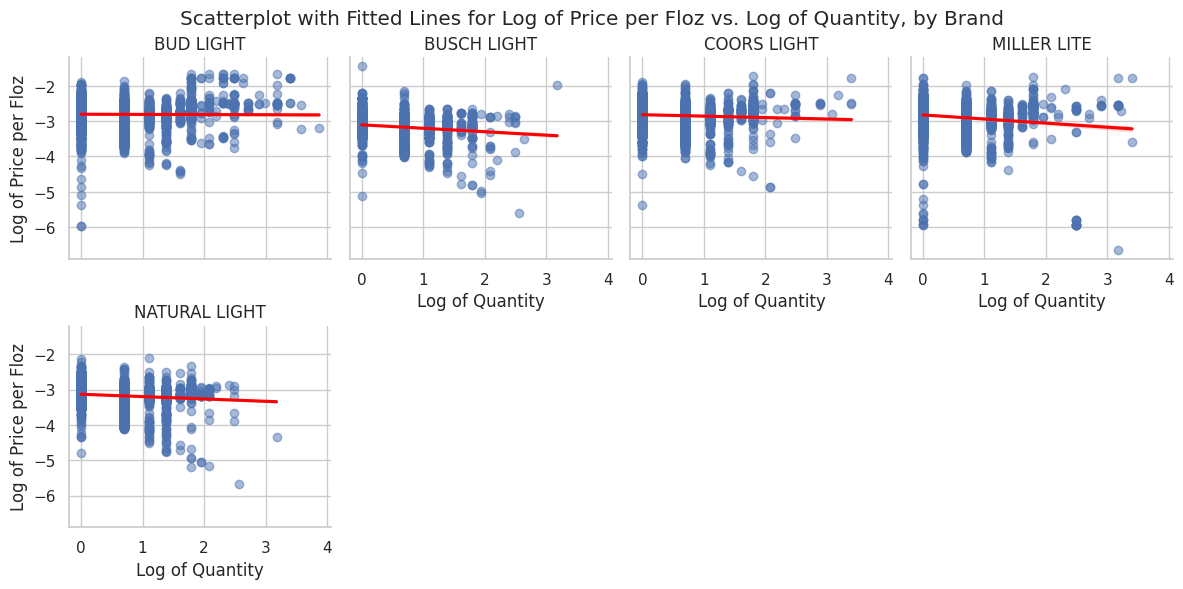

In [ ]:
# Ensure there's no entries with 0 for 'price_per_floz' or 'quantity' to avoid log(0) issues
filtered_data = beer_data[(beer_data['price_per_floz'] > 0) & (beer_data['quantity'] > 0)]

# Calculate log values for both 'price_per_floz' and 'quantity'
filtered_data['log_price_per_floz'] = np.log(filtered_data['price_per_floz'])
filtered_data['log_quantity'] = np.log(filtered_data['quantity'])

# Use seaborn to create a scatterplot with fitted lines, facetted by 'brand'
g = sns.lmplot(data=filtered_data, x='log_quantity', y='log_price_per_floz', col='brand', col_wrap=4, height=3, line_kws={'color': 'red'}, scatter_kws={'alpha':0.5})

# Adjusting plot aesthetics
g.set_titles("{col_name}")
g.set_axis_labels("Log of Quantity", "Log of Price per Floz")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Scatterplot with Fitted Lines for Log of Price per Floz vs. Log of Quantity, by Brand')

plt.show()


Here's the scatterplot with fitted straight lines for the log of price_per_floz versus the log of quantity, facetted by brands. Each subplot represents a different brand, showing the relationship between these two logarithmic variables along with a fitted line to illustrate the trend within each brand's data.





/usr/local/lib/python3.10/dist-packages/seaborn/regression.py:598: UserWarning: sharex is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/regression.py:598: UserWarning: sharey is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


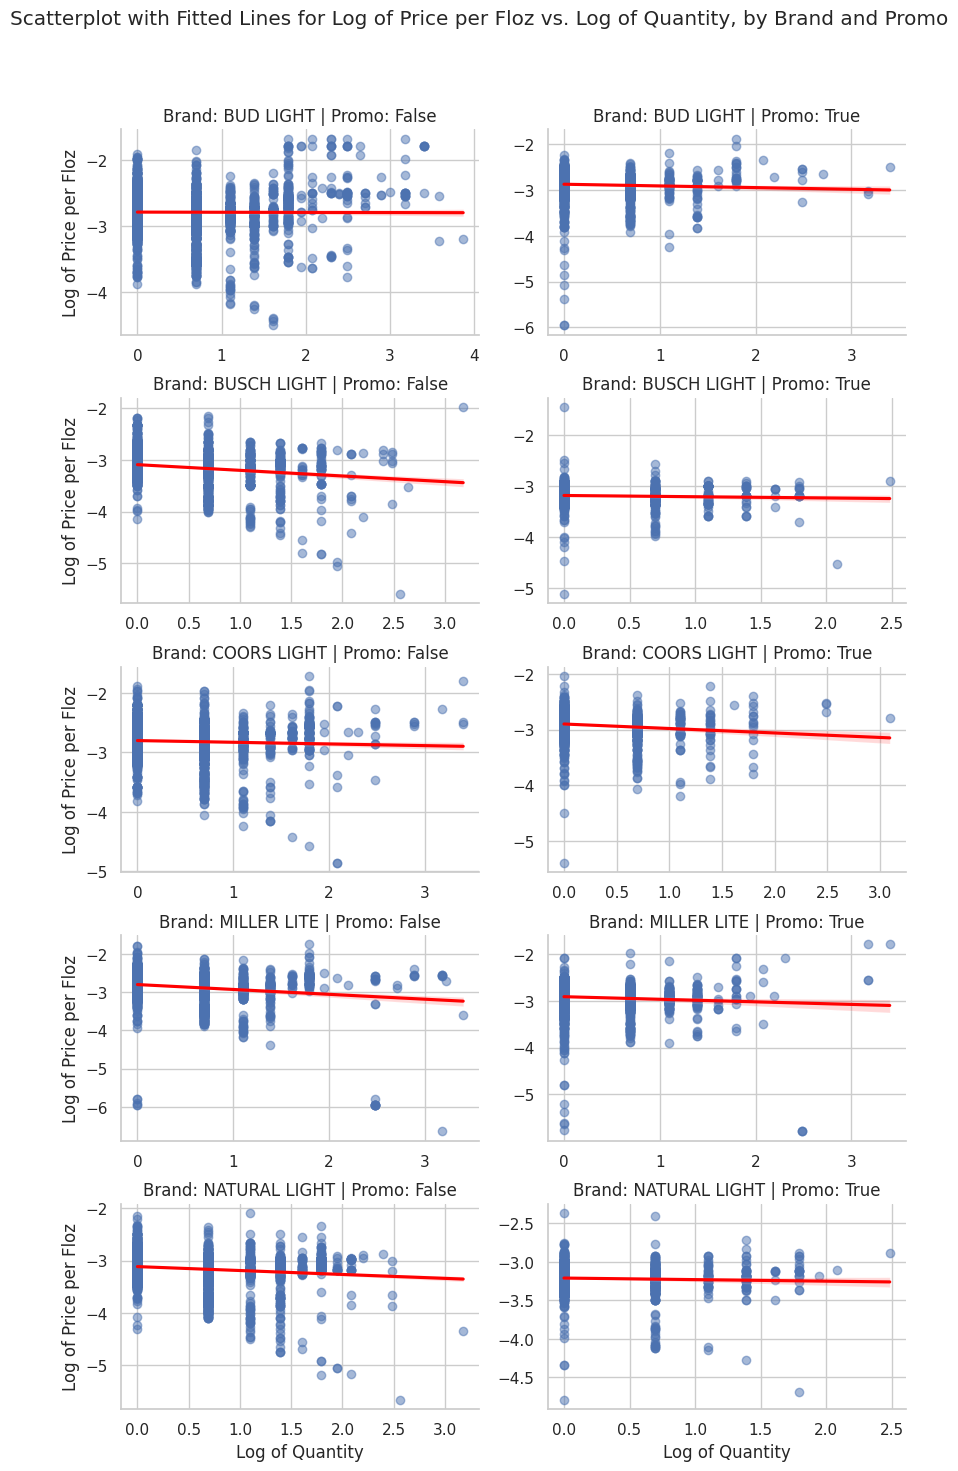

In [ ]:
# Adjust the facetting to split rows by 'brand' and columns by 'promo' for a more detailed comparative analysis
g = sns.lmplot(data=filtered_data, x='log_quantity', y='log_price_per_floz', row='brand', col='promo', height=3, aspect=1.5, line_kws={'color': 'red'}, scatter_kws={'alpha':0.5}, sharex=False, sharey=False)

# Adjusting plot aesthetics
g.set_titles("Brand: {row_name} | Promo: {col_name}")
g.set_axis_labels("Log of Quantity", "Log of Price per Floz")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Scatterplot with Fitted Lines for Log of Price per Floz vs. Log of Quantity, by Brand and Promo')

plt.show()


The scatterplot has been reorganized to split rows by brand and columns by promo status, offering a comprehensive view across different brands and their promotional status. Each subplot now provides a clear comparison of the log of price_per_floz versus the log of quantity for purchases made on promotion versus those that were not, across various beer brands.

This layout facilitates an easier comparison across brands and how promotion impacts the relationship between quantity and price per fluid ounce within each brand.

Lastly, let’s move to the fourth analysis:

## Promotional Impact on Quantity Purchased

We’ll assess the impact of promotions on the quantity of beer purchased.
For this analysis, we can calculate the average quantity purchased with
and without promotions and visualize the difference. We’ll do this for
each brand to see which brands are most affected by promotions.

Let’s begin this analysis by looking at the average quantity purchased
with and without promotions for each brand.

<ipython-input-6-b028bf7475fa>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='promo_impact', y='brand', data=promo_impact_pivot_sorted, palette='viridis')


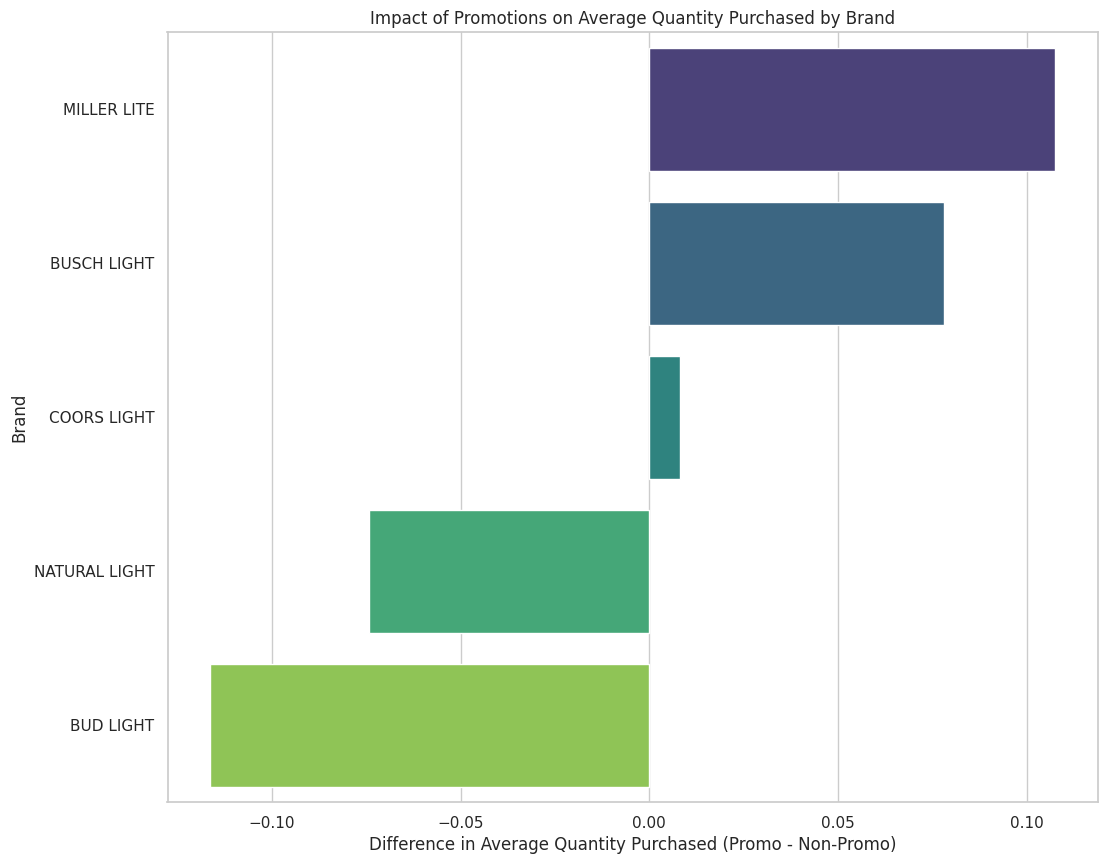

In [ ]:
# Calculate average quantity purchased with and without promotions for each brand
promo_impact = beer_data.groupby(['brand', 'promo']).agg({'quantity':'mean'}).reset_index()

# Pivot the data to have promo and non-promo side by side for each brand
promo_impact_pivot = promo_impact.pivot(index='brand', columns='promo', values='quantity').reset_index()
promo_impact_pivot.columns = ['brand', 'non_promo', 'promo']

# Calculate the difference in average quantity purchased between promo and non-promo
promo_impact_pivot['promo_impact'] = promo_impact_pivot['promo'] - promo_impact_pivot['non_promo']

# Sort by the impact of promo
promo_impact_pivot_sorted = promo_impact_pivot.sort_values('promo_impact', ascending=False)

# Plotting the difference in average quantity purchased between promo and non-promo for each brand
plt.figure(figsize=(12, 10))
sns.barplot(x='promo_impact', y='brand', data=promo_impact_pivot_sorted, palette='viridis')
plt.title('Impact of Promotions on Average Quantity Purchased by Brand')
plt.xlabel('Difference in Average Quantity Purchased (Promo - Non-Promo)')
plt.ylabel('Brand')
plt.show()

The bar chart illustrates the impact of promotions on the average
quantity of beer purchased by brand. A positive value indicates that, on
average, more beer is purchased when there is a promotion compared to
when there isn’t. Some brands appear to be significantly more influenced
by promotions, with customers buying more when the products are on sale
or promotion.

This comprehensive analysis has provided insights into purchase
patterns, demographic preferences, price sensitivity, and the impact of
promotions on beer purchases.